In [9]:
from skimage import data
from skimage.feature import Cascade
from matplotlib import patches
from skimage.io import imread
import matplotlib.pyplot as plt

In [10]:
#Load the image of Friends TV Show
friends_image = imread('https://i.pinimg.com/originals/c8/d5/0d/c8d50d58538a10aff64b647eab7c15d8.jpg')

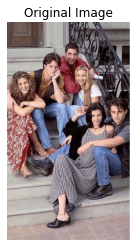

In [11]:
# Show original image
imgplot = plt.imshow(friends_image)
plt.axis('off')
plt.title("Original Image")
plt.show()

In [12]:
# Define function of defected face
def detected_face(result, detected, title="Face Detected"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()

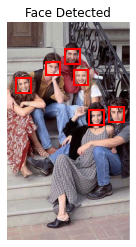

In [14]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))

# Show the detected faces
detected_face(friends_image, detected)